# Homework3

** Overview: ** 
We will use the same data file as for Homework 2 (we add cooling load in HW3, Y2). In the first task, you will create clusters based on the heating and cooling load of the buildings. In the second task, you will classify the buildings into the found clusters based on the features.

** Task 1 (2 Pt): **

1.1 (0.5 Pt) Load the csv file into Python (similar to HW 2), and separate the data into a design matrix X of size 768x8, and a target matrix Y of size (768x2).

1.2 (1.5 Pt) Perform k-means clustering on Y to create groups of buildings with similar heating and cooling load characteristics using scikitlear's KMeans cluster: Use the elbow method to choose k, i.e., perform clustering with varying k and evaluate the sum of squared errors for the resulting data. Plot k vs SSE and explain quickly your choice of k based on the plot.

** Task 2 (5 Pt): **

2.1 (1 Pt) Let k=2. Perform clustering of Y for k=2 and save the resulting cluster indices in Y['C']. 

2.2 (4 Pt) With all features (X), perform (1) Logistic Regression,  and (2) SVM classification for classyfing their cluster types (C) and report their accuracy and confusion matrix. 

** Task 3 (3 pt): **

3.1 (1 Pt) If you were to repeat Task 2 for k=3, can you use logistic regression? (If not) Why can you not use logistic regression?

3.2 (2 Pt) Describe conceptually in your own words of how you would go about creating a classification procedure for three clusters using logistic regression.

## 1.1

In [1]:
# Import pandas library
import pandas as pd

In [2]:
# Use pandas library read csv data 
eD = pd.read_csv('energyData.csv')

In [3]:
# Double check the length of eD using len()
len(eD)

768

In [4]:
# Double check the data (eD) using .head() 
eD.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [5]:
# Assign data from X1-8 features to X dataframe using iloc
X = eD.iloc[:, 0:8]

# Assign data from Y1-2 features to Y dataframe using iloc
Y = eD['Y1']

In [6]:
# Double check the data (X) using .head() 
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [7]:
# Double check the data (Y) using .head() 
Y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Y1, dtype: float64

## 1.2

In [8]:
# Import KMeans library 
from sklearn.cluster import KMeans

In [9]:
# Import pyplot library
import matplotlib.pyplot as plt

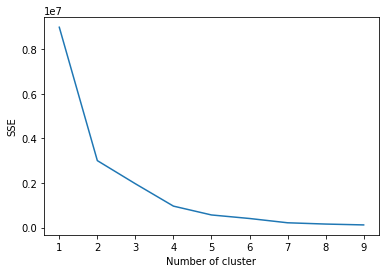

In [10]:
# Calculate SSE for different cluster numbers (cluster # (k): 1 -> 10)
# Plot k vs SSE and explain quickly your choice of k based on the plot.
sse = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# 2.1

In [20]:
#Let k=2. Perform clustering of Y for k=2 and save the resulting cluster indices in Y['C']
kmeans = KMeans(n_clusters=2, max_iter=1000).fit(X)
Y['C'] = kmeans.labels_

In [26]:
# Double check the data (Y) using .head() 
Y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Y1, dtype: object

# 2.2

In [32]:
# Import train_test_split function 
from sklearn.model_selection import train_test_split

# Split your dataset to train and test sets using train_test_split function.
# Use test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y['C'], test_size=0.2)

In [42]:
# Import LogisticRegression fucntion
from sklearn.linear_model import LogisticRegression

# Assign and train the logistic regression model
logisticRegr = LogisticRegression(random_state=0, solver='lbfgs',
                                  multi_class='multinomial')
logisticRegr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
# Test the model with prediction accuracy
score_logisticRegr = logisticRegr.score(X_test, Y_test)
# Check the accuracy of your model
score_logisticRegr

1.0

In [44]:
# Import SVM classification fucntion
from sklearn import svm

# Assign and train the SVM classification model
SVM_classifier = svm.SVC(gamma='scale')
SVM_classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
# Test the model with prediction accuracy
score_svm = SVM_classifier.score(X_test, Y_test)

# Check the accuracy of your model
score_svm

1.0

In [18]:
# Task 3

In [19]:
# 3.1

In [20]:
# 3.2